In [72]:
#pip install --user --upgrade tensorflow
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test_full,y_test_full) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [10]:
y_train_full.shape

(60000,)

In [11]:
X_test_full.shape

(10000, 28, 28)

In [14]:
X_train_full[[0]]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [16]:
X_train = X_train_full[:5000]
y_train = y_train_full[:5000]
X_test = X_test_full[:1000]
y_test = y_test_full[:1000]

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

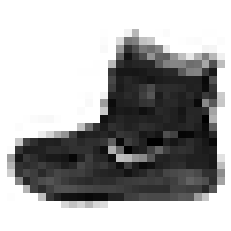

In [105]:
    plt.imshow(X_train[0],cmap='binary')
    plt.axis('off')

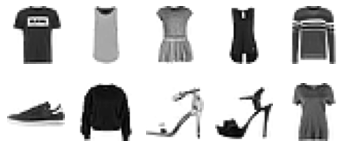

In [41]:
for i in range(1,11):
    plt.subplot(3, 5, i)
    plt.imshow(X_train[i],cmap='binary')
    plt.axis('off')

In [42]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [106]:
y_train

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [46]:
y_train_01 = to_categorical(y_train)
y_train_01

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
28*28

784

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(10, activation='softmax'))

In [109]:
256*10+10

2570

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.layers

In [101]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='adam',
              metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=30,
                    validation_split = 0.3)

Epoch 1/30
28/28 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.7734 - val_loss: 0.5110 - val_accuracy: 0.8287
Epoch 2/30
28/28 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7920 - val_loss: 0.4838 - val_accuracy: 0.8360
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8057 - val_loss: 0.4674 - val_accuracy: 0.8380
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.8203 - val_loss: 0.4608 - val_accuracy: 0.8367
Epoch 5/30
28/28 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.8191 - val_loss: 0.4514 - val_accuracy: 0.8453
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.8251 - val_loss: 0.4341 - val_accuracy: 0.8573
Epoch 7/30
28/28 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8289 - val_loss: 0.4238 - val_accuracy: 0.8547
Epoch 8/30
28/28 [==

In [103]:
model.evaluate(X_test, y_test)



32/32 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8430


[0.43730223178863525, 0.8429999947547913]

In [77]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.6))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [79]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [84]:
model2.compile(loss='sparse_categorical_crossentropy', 
             optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [85]:
history = model2.fit(X_train, y_train,
                    batch_size=128, epochs=30,
                    validation_split = 0.3)

Epoch 1/30
28/28 [==============================] - 0s 6ms/step - loss: 2.3758 - accuracy: 0.1300 - val_loss: 2.0218 - val_accuracy: 0.3580
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 2.0618 - accuracy: 0.2474 - val_loss: 1.7925 - val_accuracy: 0.5560
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 1.9002 - accuracy: 0.3200 - val_loss: 1.6069 - val_accuracy: 0.5933
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 1.7642 - accuracy: 0.3803 - val_loss: 1.4546 - val_accuracy: 0.6193
Epoch 5/30
28/28 [==============================] - 0s 2ms/step - loss: 1.6446 - accuracy: 0.4320 - val_loss: 1.3403 - val_accuracy: 0.6253
Epoch 6/30
28/28 [==============================] - 0s 2ms/step - loss: 1.5556 - accuracy: 0.4560 - val_loss: 1.2456 - val_accuracy: 0.6627
Epoch 7/30
28/28 [==============================] - 0s 2ms/step - loss: 1.4628 - accuracy: 0.5051 - val_loss: 1.1633 - val_accuracy: 0.6660
Epoch 8/30
28/28 [==

In [87]:
model2.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.7470


[0.7160685658454895, 0.746999979019165]

In [88]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.21, 0.02, 0.65],
       [0.  , 0.  , 0.89, 0.  , 0.02, 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.16, 0.02, 0.03, 0.01, 0.67, 0.  , 0.01, 0.  ],
       [0.01, 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.03, 0.1 , 0.02, 0.55, 0.02, 0.19, 0.  , 0.02, 0.  ],
       [0.01, 0.01, 0.16, 0.01, 0.3 , 0.01, 0.48, 0.  , 0.02, 0.  ],
       [0.03, 0.02, 0.03, 0.04, 0.03, 0.34, 0.04, 0.34, 0.09, 0.03],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.94, 0.01, 0.01]],
      dtype=float32)

In [96]:
y_pred = model.predict_classes(X_new)
y_pred
#class_names

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [97]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [98]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [94]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U10')

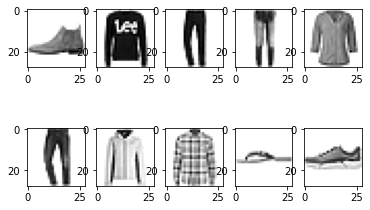

In [91]:
for i in [0,1,2,3,4,5,6,7,8,9]:
    plt.subplot(2,5,i+1)
    plt.imshow(X_new[i], cmap='binary')